# Imports

In [1]:
import os
import time
import datetime
import warnings
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F

In [24]:
from sklearn.model_selection import train_test_split

Check for cuda

In [2]:
torch.cuda.is_available()

False

Setting seeds

In [3]:
def set_seed(seed: int = 4) -> None:
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

In [8]:
set_seed()

Random seed set as 4


## Torch basics

### squeeze()

In [10]:
x = torch.zeros(2,1,2,1)

In [11]:
x.size()

torch.Size([2, 1, 2, 1])

In [14]:
y = torch.squeeze(x)

In [15]:
y.size()

torch.Size([2, 2])

## Linear Regression

### Creating dataset

In [19]:
weight = 0.75
bias = 0.25

start = 0
end = 1
step = 0.004
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [20]:
len(X), len(y)

(250, 250)

In [21]:
X[:5], y[:5]

(tensor([[0.0000],
         [0.0040],
         [0.0080],
         [0.0120],
         [0.0160]]),
 tensor([[0.2500],
         [0.2530],
         [0.2560],
         [0.2590],
         [0.2620]]))

### Splitting the data into train and test set

In [25]:
training_split = int(0.8 * len(X))

X_train, y_train = X[:training_split], y[: training_split]

X_test, y_test = X[training_split:], y[training_split:]

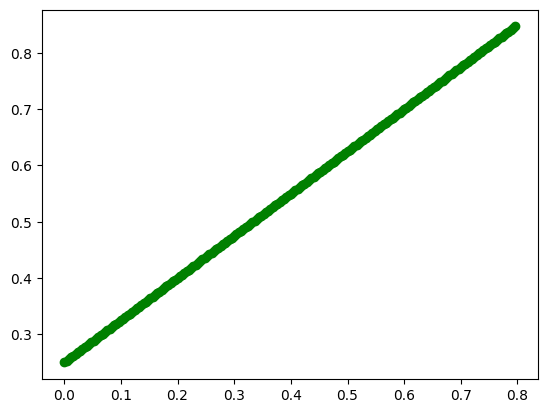

In [27]:
plt.scatter(X_train,
                y_train,
                c="g",
                label = "Training Data")

## Plots

In [30]:
def plot_dataset(train_data,
                 train_label,
                 test_data,
                 test_label,
                 valid_data = None,
                 valid_label = None,
                 fig_size = (10, 5),
                 predictions=None) -> None:
    plt.figure(figsize=fig_size)

    plt.scatter(train_data,
                train_label,
                c="g",
                label = "Training Data")
    
    plt.scatter(test_data,
                test_label,
                c="r",
                label = "Testing Data")
    
    if valid_data is None or valid_label is None:
        plt.scatter(valid_data,
                    valid_label,
                    c="b",
                    label = "Validation Data")
    
    plt.legend()

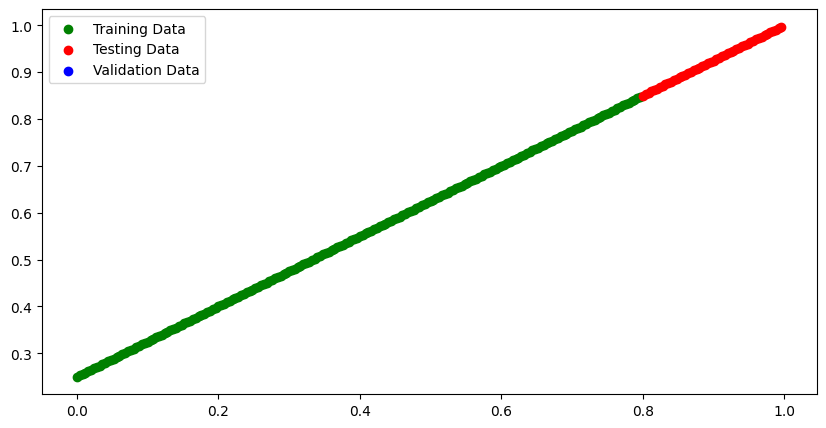

In [31]:
plot_dataset(train_data=X_train,
             train_label=y_train,
             test_data=X_test,
             test_label=y_test)

In [ ]:
def split_and_plot(training_data,
                   testing_data,
                   ):
    pass

## Creating Linear Regression Model

In [14]:
class LinearRegressionModel(nn.Module):  # Wea re creating a subclass from  nn.module
    def __init__(self):
        super().__init__()

        # Initializing the model parameters: Weights and Bias
        '''
        requires_grad=True; means PyTorch will track the gradients of the specific params for use with torch.autograd

        '''
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1, 
                                             requires_grad=True,
                                             dtype = torch.float))
        
    # Forward Pass, Here we are overwriting the forward method, given by default from nn.module
    # def forward(self,
    #             x: torch.Tensor) -> torch.Tensor:
    #     return self.weights * x + self.bias  # The Linear regression Formula
    
    def forward_lin_reg(self,
                        x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [46]:
set_seed()
lin_reg_0 = LinearRegressionModel()

Random seed set as 4


In [47]:
lin_reg_0

LinearRegressionModel()

In [48]:
list(lin_reg_0.parameters())

[Parameter containing:
 tensor([-1.6053], requires_grad=True),
 Parameter containing:
 tensor([0.2325], requires_grad=True)]